## Chapter 3
## Linear Regression

### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.optimize as opt
import statistics as stats
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import PolynomialFeatures

It assumes that there is approximately a linear regression b/w X and y. Mathematically we can write this relationship as $$Y = \beta_0 + \beta_1 X$$
where $\beta_0$ represents _intercept_ and $\beta_1$ represents _slope_.

Once we estimate these parameters we can predict y using 
$$\hat y = \hat \beta_0 + \hat \beta_1 x$$
prediction of Y on the basis X = $x$.


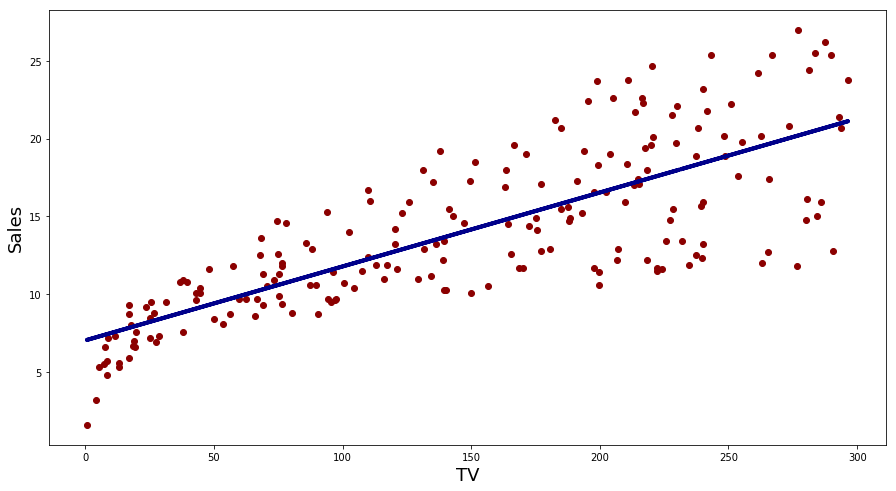

In [13]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Advertising.csv"
plt.figure(figsize = (15,8))
Advertising = pd.read_csv(url, index_col = 0)
plt.scatter(Advertising.TV, Advertising.Sales, color = "darkred")
z = np.polyfit(Advertising.TV, Advertising.Sales, 1) # fitting a straight line
f = np.poly1d(z)
plt.plot(Advertising.TV, f(Advertising.TV), linewidth = 4.0, color = "darkblue")
plt.xlabel("TV", fontsize = 18)
plt.ylabel("Sales", fontsize = 18)
plt.show()

Let $\hat y_i = \beta_0 + \hat \beta_1 x_i$ be the prediction for Y based in the ith value of X. Then $e_i = y_i - \hat y_i$ represents the ith residual (this is the difference between the ith observed response value and the ith response value predicted by the linear model. Then residual sum of square(RSS) is $$RSS = e_1^2 + e_2^2 + .... + e_n^2$$.

According to the least square approach, we are minimizing the RSS to estimate the $\beta's$.

$$\hat \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}$$.
and $\hat \beta_0 = \bar y - \hat \beta_1 \bar x$

These are called least square estimates of the linear regression model.

In [14]:
# We can look at the coefficient of the above equation
print(z)

[0.04753664 7.03259355]


In [15]:
# Now plotting the RSS on uncentered data won't be visually appealing so we will fit the equation on centered data.
TV = scale(Advertising.TV, with_mean = True, with_std = False)
z = np.polyfit(TV, Advertising.Sales, 1) # fitting a straight line
print(z)

[ 0.04753664 14.0225    ]


In [16]:
intercept = z[1]
slope = z[0]
b0 = np.linspace(intercept - 2, intercept + 2, 50) # selecting a range of values for intercept and slope
b1 = np.linspace(slope - 0.02, slope + 0.02, 50)
X, Y = np.meshgrid(b0, b1) # Creating the mashgrid for contour plot
rss = np.zeros((b0.size, b0.size))

#Calculating RSS for all the possible combination of coefficient values
for (i,j),k in np.ndenumerate(X):
    rss[i,j] = ((Advertising.Sales - (X[i,j] + TV.ravel() * Y[i,j]))**2).sum()/1000

# Minimum value of RSS
min_RSS = ((Advertising.Sales - (intercept + TV* slope))**2).sum()/1000
min_RSS

2.102530583131352

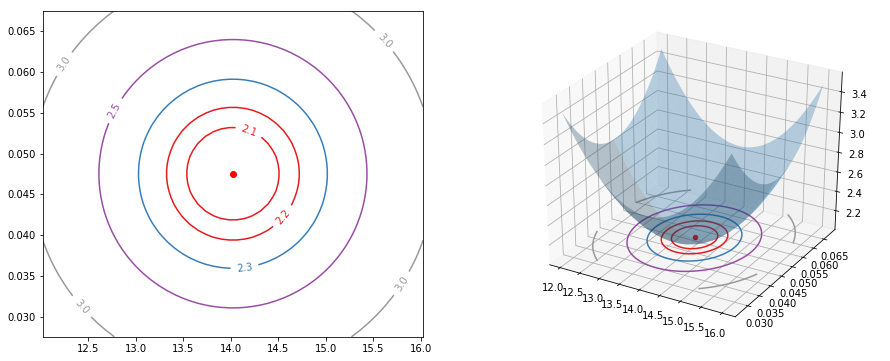

In [17]:
# Contour plot
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(121)
CS = ax1.contour(X,Y,rss, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(intercept, slope, color = 'r') # plotting the minimum RSS value
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# 3D plot

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, rss, rstride = 3, cstride = 3, alpha = 0.3) # alpha will remove the grid lines from the plot
# cmap is the set of colors. offset is used so that the contour will come on the 2D surface.
ax2.contour(X,Y,rss, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3], offset = rss.min())
ax2.scatter3D(intercept, slope, min_RSS, color = 'r')
plt.show()

As we can see from the above 2 plots. We have plotted RSS for a number of values of $\beta$ coefficients and the least square estimates provide the minimum RSS.

#### Assesing the accuracy of coefficient estimates 

$Y = f(x) + \epsilon$

If we assume the true relationship is linear $Y = \beta_0 + \beta_1 X + \epsilon$, then 

$\beta_0$ = intercept, expected value of Y when X = 0.

$\beta_1$ = slope, the average increase in Y for unit increase in X and we assume that $\epsilon$ is independent of X.

Let's assume a model
$$Y = 2 + 3X + \epsilon$$
This is the true relationship between Y and X. We can generate some random numbers from it and use least square estimation to estimate the $\beta$ coefficients.

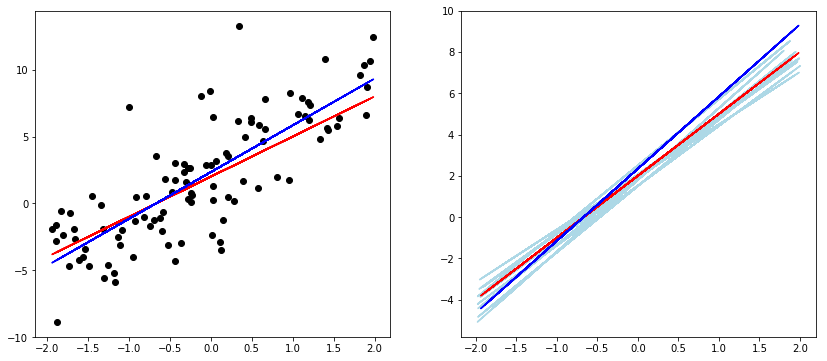

In [8]:
np.random.seed(2)
X = np.random.uniform(low = -1.99, high = 2.01, size = 100) # generating random numbers for X
e = np.random.normal(loc =0, scale = 2.5, size = 100) # generating random numbers from normal dist with mean 0.
Y = 2 + 3 * X + e # Y is coming from the model defined above
z = np.polyfit(X,Y,1) # fitting the model from the sample generated from the model
f = np.poly1d(z)

def true_f(X): # Calculating the true function
    return (2 + 3*X)

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.scatter(X,Y,color = "black", marker = 'o')
plt.plot(X, true_f(X), color = "red")
plt.plot(X, f(X), color = "blue")

plt.subplot(1,2,2)
for i in range(10):
    X1 = np.random.uniform(low = -1.99, high = 2.01, size = 100) # generating random numbers for X
    e1 = np.random.normal(loc =0, scale = 2.5, size = 100) # generating random numbers from normal dist with mean 0.
    Y1 = 2 + 3 * X1 + e1 # Y is coming from the model defined above

    z1 = np.polyfit(X1,Y1,1) # fitting the model from the sample generated from the model
    f1 = np.poly1d(z1)
    plt.plot(X1, f1(X1), color = 'lightblue')

plt.plot(X, true_f(X), color = "red")
plt.plot(X, f(X), color = "blue")
plt.show()

The red line is the true relationship, but we can use least square estimation to estimate that relationship. But we can see that different samples generated from the same model gives different straight line.

__Concept of Bias :-__ If we use $\hat \mu$ to be an estimate of $ \mu $ then this estimate is biased, in a sense that on average we expect $\hat \mu$ to equal $\mu$. In the same way we expect our least square coefficients to be equal to actual coefficients. 

__How accurate is the estimate of $\beta_0$ and $\beta_1$?__

As we have only one dataset, we have a single estimate of $\mu$. To answer closeness, we calculate standard error of $\hat \mu$ written as 
$$Var(\hat \mu) = SE(\hat \mu)^2 = \frac{\sigma^2}{n}$$

$\sigma$ = standard deviation of each of the realization $y_i$ of Y. S.E. tell us the average amount that this estimate $\hat \mu$ differs from actual value $\mu$. Also, how this deviation shrinks with n.


Similarly,
$$SE(\hat \beta_0)^2 = \sigma^2 [\frac{1}{n} + \frac{\bar x^2}{\sum_{i = 1}^{n} (x_i - \bar x)^2}]$$

and, $$SE(\hat \beta_1)^2 = \frac{\sigma^2}{\sum_{i = 1}^{n} (x_i - \bar x)^2}$$

$$\sigma^2 = Var(\epsilon)$$

In SE$(\beta_1)^2$, standard error will be smaller if the $x_i's$ are more spread out, intuitively, we have more leverage to estimate a slope in this case.
Also, if $\bar x = 0$, then $$SE(\hat \beta_0)^2 = \frac{\sigma^2}{n} = var(\hat \mu)$$

$\sigma^2$ is not known, it can be estimated from the data as $\sqrt{\frac{RSS}{(n-2}}$

Standard Error can be used to compute confidence interval.

95% confidence interval for $\beta_1$
$$\hat \beta_1 \pm 2.SE(\hat \beta_1)$$

This results holds if errors are gaussian.

__Interpretation :- __

1. In case X = 0, the value of Y will fall between {$\hat \beta_0 - 2\ S.E.(\hat \beta_0),\ \hat \beta_0 + 2\ S.E.(\hat \beta_0)$}.
2. With unit increase in value of X, Y will increase by {$\hat \beta_1 - 2\ S.E.(\hat \beta_1),\ \hat \beta_1 + 2\ S.E.(\hat \beta_1)$}


__Hypothesis testing :-__

$H_0$ :- There is no significant relationship b/w X and Y.
$H_1$ :- There is a significant relationship b/w X and Y.

Mathematically, $$H_0 : \beta_1 = 0$$
$$H_1 : \beta_1 \ne 0$$

We are testing if $\beta_1$ is sufficiently far enough from zero.

* How far is far enough?

If the $S.E.(\hat \beta_1)$ is very high, then $\beta_1$ must be large enough in order to reject $H_0$.

In contrast, if $S.E.(\hat \beta_1)$ is small, then even very small value of $\beta_1$ provide strong evidence that $\beta_1 \ne 0$ and hence there is a relationship betwen X and Y.

We compute t-statistics,
$$t = \frac{\hat \beta_0 - 0}{S.E.(\hat \beta_1)}$$

If there is no relationship, the t will follow t-distributionwith n degrees of freedom. Then, calculate the prob. of observing any value equal to |t| or larger, assuming $\beta_1 = 0$.

Small p-values indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between predicton and the response.


#### Assessing the accuracy of the model

The quality of the linear regression fit is typically assessed using two related quantity.

1. Residual Standard error.
2. $R^2$ statistics.

__Residual Standard error :- __

In the equation $Y = \beta_0 + \beta_1 X + \epsilon$, 

RSE is the estimate of standard deviation of $\epsilon$.

RSE is the average amount that the response will deviate from the regression line.
$$RSE = \sqrt{\frac{1}{(n-2} RSS} = \sqrt{\frac{1}{(n-2)} \sum_{i = 1}^{n} (y_i - \hat y_i)^2}$$

RSE is a measure of lack of fit. 

__Drawbacks of RSE :-__ RSE is measured in the units of Y, it is not always clear what constitutes a good RSE.

__$R^2$ Statistics :- __

Proportion of variance explained.

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$.

TSS = Total variance in the response Y. Amount of variability inherent in the response before the regression is performed.

RSS = Amount of variability that is left unexplained after performing the regression.

Hence, TSS - RSS = Amount of variability in the response explained by performing regression.

$R^2 statistics$ :- Measure the proportion of variability in Y that can be explained by X. It's a measure of linear relationship between X and Y. 

In simple linear regression setting, $R^2 = r^2$.

### Multiple Linear Regression

In case of more than 1 predictor, we give each predictor a seperate slope in the equation.
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...... + \beta_p X_p + \epsilon$$ 

$\beta_j$ -> average effect on Y of a one unit increase in $X_j$ holding all other predictors fixed.

The parameters estimated using least square approach.
$$\hat y = \hat \beta_0 + \hat \beta_1 x_1 + \hat \beta_2 x_2 + ........ + \hat \beta_p x_p$$

We need to choose $\beta's$ to minimize the sum of squared residuals.
$$RSS = \sum_{i = 1}^{n}(y_i - \hat y_i)^2$$

__Some Important Questions :-__

__Q1. Is atleast one of the predictors useful in predicting the response?__

Our null hypothesis is 
$$H_0 : \beta_1 = \beta_2 = ..... = \beta_p = 0$$
v/s
$$H_1 : atleast\ one\ \beta_j\ is\ non-zero$$

$$F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

If the linear assumptions are correct, then
$$E(RSS/(n-p-1)) = \sigma^2$$
and provided $H_0$ is true
$$E((TSS-RSS)/p) = \sigma^2$$

Hence, when there is no relationship between the predictors and response, F-statistics expected to be close to 1.
On the other hand, if $H_1$ is true, then $E((TSS-RSS)/p) > \sigma^2$, so we expect F to be greater than 1.

When n is large, an F-statistics that is just a little larger than 1 might provide evidence against $H_0$.

If $H_0$ is true, 

$\epsilon_i$ are normally distributed F-statistics follow F distribution.

Why do we neef F-statistics if we have individual t-statitics?

If $H_0 : \beta_1 = \beta_2 = ..... \beta_p = 0$ is true there are 5% chance that atleast one of the predictors is related to the response according to t-statistics.

t-statistics for individual parameters are exactly equivalent to F-test that omits that single variable from the model. So, it reports the partial effect of adding that variable to the model.

__Q2. Deciding on important variables__ 

__Variable selection__ :- to select a subset of all variables that have a significant impact on the response.

1. Fit models with all the possible combinations of variables then choose a model selection criteria (AIC, BIC, adjusted R squared, Mallow's C statistics) to select a model.
2. Forward, Backward or Mixed selection.

* __Forward Selection__ :- We begin with the null model - a model with only intercept.

     We then fits p simple linear regression and add to the null model the variable that results in lowest RSS.
     
     We then add to the model the variable that results in lowest RSS for the new two-varaible model and so on.
     
     We might include some variables early that later becomes redundant.
     
* __Backward Selection__ :- We start with all variable in the model, and remove the variable with largest p-value.
     
     The new (p-1) variable model is fit, and the model with largest p-value is removed.
     
     The process may stop when all remaining variable have p-value below some threshold.
     
     Backward selection can't be used if p>n.
     
* __Mixed Selection__ :- We begin with the null model - a model with only intercept.
     
     As with forward selection, we add the variable that provides the best fit.
     
     If at point the p-value for any one of the variable in model rises above a certain threshold, then we remove that variable from the model.
     
     We continue until all variable in the model have sufficiently low p-value and all variables outside the model would have a large p-value if added to the model.

__Q3. Model Fit__

There are two measures of model fit.
1. RSE - Residual sum of squares.
2. $R^2$.

In multiple linear regression, $R^2 = Cor(Y,\hat Y)^2$. 

Our fittes model is maximizing the correlation between Y and $\hat Y$ among all the possible linear models. 

$R^2$ increase as no. of parameters increase. But if adding a new paramter is not increasing $R^2$ significantly then it might cause overfitting.
$$RSE = \sqrt{\frac{RSS}{(n-p-1)}}$$
In presence of a non-linear pattern, the residual plot will show a pattern in terms of under estimation and over estimation.

In [46]:
X = np.array(Advertising[['Radio','TV']])
y = np.array(Advertising['Sales'])

# Fitting a linear regression model with 2 predictors.
lm = LinearRegression()
lm.fit(X,y)

print(lm.coef_)
print(lm.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


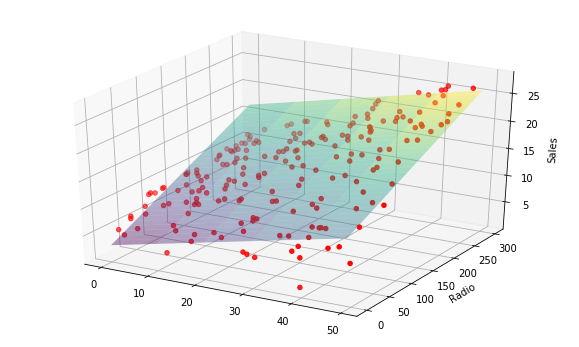

In [53]:
Radio = np.arange(0,50)
TV = np.arange(0,300)

X1, Y1 = np.meshgrid(Radio, TV)

pred = np.zeros((TV.size, Radio.size))

for (i,j),k in np.ndenumerate(pred):
    pred[i,j] = (lm.intercept_ + lm.coef_[0] * X1[i,j] + lm.coef_[1] * Y1[i,j])
    

fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')

ax.plot_surface(X1, Y1, pred,cstride = 10,rstride = 10, alpha = 0.4, cmap='viridis')
ax.scatter3D(Advertising.Radio, Advertising.TV, Advertising.Sales, color ="red")
ax.set_label('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales');
plt.show()

__Q4. Prediction __

3 sorts of unertainity with predictions:-
1. Our $\beta's$ are an estimate of true regression coefficients. The inaccuracy is coefficient is related to reducible error. We can compute confidence interval in order to determine how close predicted Y will be from f(x).
2. Model Bias :- If linear assumption is not true, it will create a discrepancy in prediction.
3. Irreducible Error :- After knowing true $\beta's$, response cannot be predicted perfectly because of random error $\epsilon$ in the model. We can use prediction intervals to answer this question.

Prediction intervals are wider than confidence interval because it incorporates both reducible and irreducuble error.

Confidence interval can be used to measure closeness of average value of response.

Prediction interval can be used to measure closeness of a particular unit.

### Qualitative Predictors

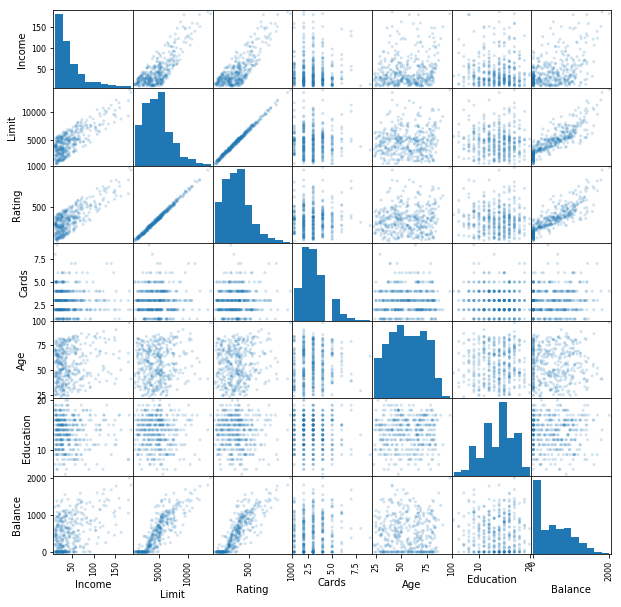

In [4]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Credit.csv"
Credit = pd.read_csv(url, index_col = 0)
ax = pd.plotting.scatter_matrix(Credit, alpha = 0.2, figsize = (10,10))

Above scatter plot shows the qunatitative predictors relationship. Other than that there are some of the qualitative variables that we would like to use as input in prediction. 

#### Predictors with only 2 levels
To include these kind of variables, we can simply create a dummy variable that takes two possible values
$$x_i\ =\ 1\ if\ ith\ row\ belongs\ to\ class\ 1 $$
$$x_i\ =\ 0\ if\ ith\ row\ belongs\ to\ class\ 2 $$
and use this variable in the model.

This will create a model as 
$$y_i = \beta_0 + \beta_1 + \epsilon_i\ \ \ if\ ith\ row\ belongs\ to\ class\ 1 $$
$$y_i = \beta_0 + \epsilon_i\ \ \ if\ ith\ row\ belongs\ to\ class\ 2 $$

Here, $\beta_0$ is the average value of y among class 1 and $\beta_0 + \beta_1$ is the average value of y among class 2. $\beta_1$ is the average difference between class 1 and class 2

If 
$$x_i\ =\ 1\ if\ ith\ row\ belongs\ to\ class\ 1 $$
$$x_i\ =\ -1\ if\ ith\ row\ belongs\ to\ class\ 2 $$
and use this variable in the model.

This will create a model as 
$$y_i = \beta_0 + \beta_1 + \epsilon_i\ \ \ if\ ith\ row\ belongs\ to\ class\ 1 $$
$$y_i = \beta_0 - \beta_1 + \epsilon_i\ \ \ if\ ith\ row\ belongs\ to\ class\ 2 $$

#### Predictors with more than 2 levels
For n levels of a qualitative variable, we create (n-1) dummy variables.
$$x_{i1}\ =\ 1\ if\ ith\ row\ belongs\ to\ class\ 1 $$
$$x_{i1}\ =\ 0\ if\ ith\ row\ do\ not\ belongs\ to\ class\ 1 $$

$$x_{i2}\ =\ 1\ if\ ith\ row\ belongs\ to\ class\ 2 $$
$$x_{i2}\ =\ 0\ if\ ith\ row\ do\ not\ belongs\ to\ class\ 2 $$
Both variable are used in model and eq. becomes

$$y_i = \beta_0 + \beta_1 + \epsilon_i\ \ \ if\ ith\ row\ belongs\ to\ class\ 1 $$
$$y_i = \beta_0 + \beta_2 + \epsilon_i\ \ \ if\ ith\ row\ belongs\ to\ class\ 2 $$
$$y_i = \beta_0  + \epsilon_i\ \ \ if\ ith\ row\ belongs\ to\ class\ 3 $$

Here, $\beta_0$ is the average response for class 3 and $\beta_1$ is the diference between average response between class 1 and class 3. $\beta_2$ is the diference between average response between class 2 and class 3. Class 3 is called the __baseline__.

There are many different ways of coding qualitative variables besides the dummy variable approach taken here. All of these approaches lead to equivalent model fits, but the coefficients are different and have different interpretations, and are designed to measure particular contrasts.

#### Extension of Linear Model
Two important assumptions of linear models
1. Additive
2. Linear


#### Extension of Linear Model
2 important assumption of linear models
1. Addtitive
2. Linear.


1. Removing the additive assumption :-
Additive :- This means that the effect of changes in a particular $X_j$ on response Y is independent of values of other predictors.

In real life problem, the increase in value of $X_1$, changes the effectiveness of variable $X_2$.
In marketing, this is called __synergy effect.__ In statistics, this is called __interaction effect__.

Now we extend our model to allow for interaction.
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \epsilon$$
$$= \beta_0 + (\beta_1 + \beta_3 X_2)X_1 + \beta_2 X_2  + \epsilon$$
$$\beta_0 + \beta_{1}^{*}X_1 + \beta_2 X_2  + \epsilon$$

where $\beta_1^{*} = \beta_1 + \beta_3 X_2$

Since $\beta_1^{*}$ changes with $X_2$, the effect of $X_1$ on Y is no longer constant, adjusting $X_2$ will change the impact of $X_1$ on Y. 
And, $\beta_3$ = increase in effectiveness of $X_1$ with unit increase in $X_2$.

Sometimes, it happens that an interaction term has small p-value but main effect has large p-value.

The hierarchial principal states that if we include an interaction effect in a model, we should also include the main effect, even if the p-values associated with their coefficients are not significant.

If we remove main effect of $X_1\ and\ X_2$, then as $X_1 * X_2$ is correlated with $X_1$ & $X_2$, it will alter the meaning of interaction.

2. Non-Linear Relationships :-
IF the actual relationship is not linear, then a simple approach to incorporate non-linear association in a linear model is to include transformed version of the predictors in the model. 
Eg. In case of quadratic relationship,

$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$$
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2^2 + \epsilon$$
Is still is linear as
$$X_2 = X^2$$
$$X_1 = X$$
This approach is called __polynomial regression model__.

In [2]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Auto.csv"
Auto = pd.read_csv(url, error_bad_lines = False, na_values = '?')

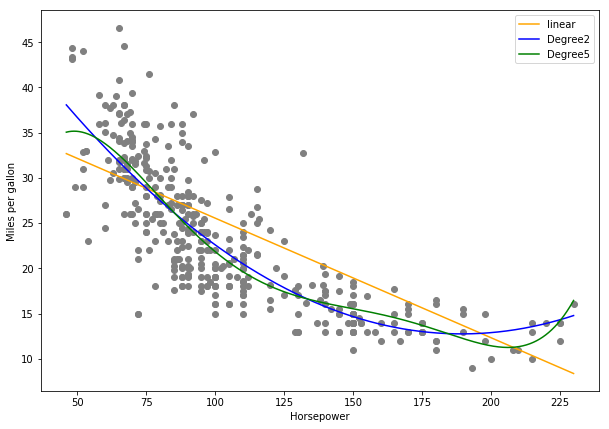

In [3]:
z = np.polyfit(Auto.horsepower, Auto.mpg, 1) # fitting a straight line
f1 = np.poly1d(z)
z = np.polyfit(Auto.horsepower, Auto.mpg, 2) # fitting a straight line
f2 = np.poly1d(z)
z = np.polyfit(Auto.horsepower, Auto.mpg, 5) # fitting a straight line
f3 = np.poly1d(z)

x1 = np.linspace(min(Auto.horsepower), 200, 1000)
x = np.linspace(min(Auto.horsepower), max(Auto.horsepower), 1000)

plt.figure(figsize = (10,7))
plt.scatter(Auto['horsepower'], Auto['mpg'], color = 'grey', label = "")
plt.plot(x, f1(x1), color = 'orange', label = 'linear')
plt.plot(x, f2(x), color = 'blue', label = 'Degree2')
plt.plot(x, f3(x), color = 'green', label = 'Degree5')
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.legend()
plt.show()

In the above plot it is clear linear fit is overfitting in case of high values of horsepower. This is because of the relationship is not linear. A polynomial fit with degree 2 seems to provide a better fit. 

But when we try to fit a higher degree polynomial, the fit seems to becomes ziggly and also in the end, the curve seems to take a upward trend. This clears that a mindful choice of degree of polynomial is required.

#### Potential Problem:-
1. __Non-linearity of the data__

If the true relationship between the response and predictors then all conclusion will be suspected. 
Residual plots are useful for identifying the non-linearity. 

In case of simple linear regression, we can plot residual $e_i = y_i - \hat y_i$ against $x_i$.

In case of multiple regression, we can plot $e_i\ with\ \hat y_i$. 

If the residual plot shows a pattern, then there is a non-linearity present in the data. Remedy is to use non-linear transformation of predictors such as logX, $\sqrt X\ etc.$


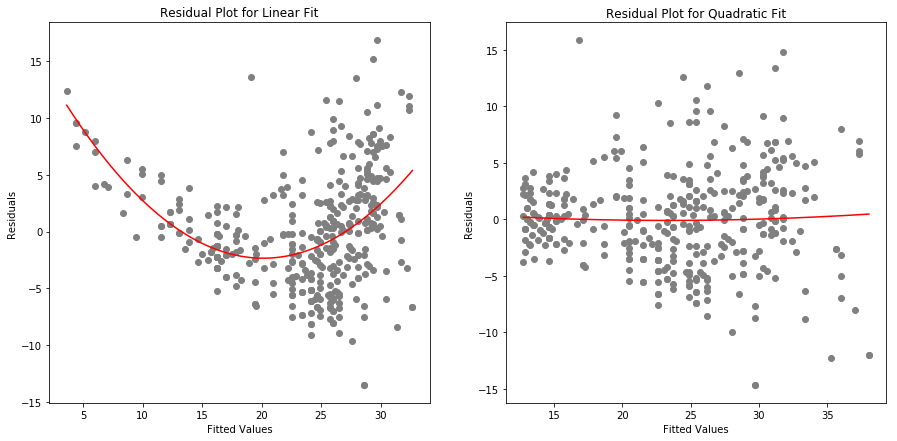

In [16]:
res_f1 = Auto.mpg - f1(Auto.horsepower)
res_f2 = Auto.mpg - f2(Auto.horsepower)
res_f1_f = np.polyfit(f1(Auto.horsepower), res_f1, 2)
z1 = np.poly1d(res_f1_f)

res_f2_f = np.polyfit(f2(Auto.horsepower), res_f2, 2)
z2 = np.poly1d(res_f2_f)

x = np.linspace(min(f1(Auto.horsepower)), max(f1(Auto.horsepower)), 1000)

plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.scatter(f1(Auto.horsepower), res_f1, color = 'grey', label = "")
plt.plot(x, z1(x), color = 'r')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Fit')

x = np.linspace(min(f2(Auto.horsepower)), max(f2(Auto.horsepower)), 1000)

plt.subplot(1,2,2)
plt.scatter(f2(Auto.horsepower), res_f2, color = 'grey', label = "")
plt.plot(x, z2(x), color = 'r')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Quadratic Fit')
plt.show()

The above plot shows that residuals from the linear fit show a pattern and suggest a non linear fit. On the right side, residuals from the quadratic fit show little pattern and mostly is random.

2. __Correlation of error terms__

If error are uncorrelated then residuals $e_i$ are positive provides little or no information about the sign of $e_{i+1}$.

In case of correlation among error terms, estimated standard errors underestimate true standard errors and hence CF will be narrower. 

Autocorrelation is common in time series data. It can be found outside of time series data as well if the data points belongs to same profile. We can plot residuals against time. If residuals are positively correlated they tends to take similar values. 

3. __Non- constant variance of error term__

Our assumption is $$Var(\epsilon_i) = \sigma^2 (homocedasticity)$$
And, SE, CI and hypothesis test rely on this assumptions. For ex:- Variance of errors may increase with value of the response.

A funnel shaped in residual plot is a sign of heterocedasticity. One possible solution is to transform our response variable like log Y and $\sqrt Y$, this results in greater amount of shrinkage of larger values of Y. 

Weighted least squares:- If ith response is average of $n_i$ raw observation.
$$Average \sigma_i^2 = \sigma^2/n_i$$
In this case, we can use weighted least squares with weights proportional to inverse variance i.e. $w_i\ =\ n_i$.

4. __Outliers__

An outlier is a point for which $y_i$ is far from the value predicted by the model. If no. of outliers are very less, then it won't effect the regression line much but it will effect our RSE and hence confidence interval and p-value.

Residual plot is used to identify outlier. But how large a residual is to call an outlier?
For this we calculate studentised residual and if it is greater than 3 then it is possibly an outlier.
$$\frac{e_i}{Estimated\ SE(e_i)}$$

5. __High Leverage Point__

A high leverage point that has an unusual value for a predictor. High leverage point has a higher impact on regression line than outlier. In multiple linear regression, it is possible to have an observation that is in the range of predictors but unusual in terms of the set of full predictors. 

For simple regression linear regression,

$$h_i = \frac{1}{n} + \frac{(x_i - \hat x)^2}{\sum (x_i - \hat x)^2}$$
$$1/n < h_i < 1$$
Average leverage is $\frac{(p + 1)}{n}.$

If leverage statistics is very higher than $\frac{(p + 1)}{n}$, then it is a high leverage point.

6. __Collinearity__

It refers to a situation in which two or more predictor variables are closely related to one another. Since 2 variables tends to increase or decrease together, it become difficult to determine how each of the variable behave seperately.

Two collinear variables result in a broader set of values for 2 variables that results in same RSS. Hence small changes in data and coefficients can take a lot of values that yields smallest RSS. This results in uncertainity in $\beta's$ and hence S.E($\hat \beta)$ increase.

Collinearity reduces the accuracy of estimates of regression coefficients, it cause standard error for $\beta$ to grow.

Colinearity reduces the probability of correctly detecting a non-zero coefficient.  Multicollinearity is the case when 3 or more variables has a particularly high correlation even if no pair of variable are correlated.

In [72]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Credit.csv"
Credit = pd.read_csv(url, index_col = 0)

Credit['Age'] = scale(Credit.Age, with_mean = True, with_std = False)
Credit['Limit'] = scale(Credit.Limit, with_mean = True, with_std = False)
Credit['Rating'] = scale(Credit.Rating, with_mean = True, with_std = False)

/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [75]:
# Linear Model with Age and Limit as predictors
X = np.array(Credit[['Age','Limit']])
y = np.array(Credit['Balance'])
lm = LinearRegression()
lm.fit(X,y)

intercept = lm.intercept_
slope_1 = lm.coef_[0]
slope_2 = lm.coef_[1]

min_RSS = ((Credit.Balance - (intercept + Credit.Age* slope_1 + Credit.Limit* slope_2))**2).sum()/1000000
min_RSS

# Linear Model with Ratings and Limit as predictors
X = np.array(Credit[['Rating','Limit']])
y = np.array(Credit['Balance'])
lm = LinearRegression()
lm.fit(X,y)

intercept1 = lm.intercept_
slope_11 = lm.coef_[0]
slope_21 = lm.coef_[1]

min_RSS = ((Credit.Balance - (intercept + Credit.Age* slope_1 + Credit.Limit* slope_2))**2).sum()/1000000

min_RSS1 = ((Credit.Balance - (intercept1 + Credit.Rating* slope_11 + Credit.Limit* slope_21))**2).sum()/1000000

print(min_RSS, min_RSS1)

21.098589345243543 21.42716219690807


In [83]:
b1 = np.linspace(0.15,0.20, 50)
b2 = np.linspace(-5,1, 50)
X, Y = np.meshgrid(b1, b2) # Creating the mashgrid for contour plot
rss = np.zeros((b1.size, b1.size))

#Calculating RSS for all the possible combination of coefficient values
for (i,j),k in np.ndenumerate(X):
    rss[i,j] = ((Credit.Balance - (intercept + Credit.Limit.ravel() * X[i,j] + Credit.Age.ravel() * Y[i,j]))**2).sum()/1000000

b1 = np.linspace(-0.2, 0.2, 50)
b2 = np.linspace(-1, 5, 50)
X1, Y1 = np.meshgrid(b1, b2) # Creating the mashgrid for contour plot
rss1 = np.zeros((b1.size, b1.size))

#Calculating RSS for all the possible combination of coefficient values
for (i,j),k in np.ndenumerate(X1):
    rss1[i,j] = ((Credit.Balance - (intercept1 + Credit.Limit.ravel() * X1[i,j] + Credit.Rating.ravel() * Y1[i,j]))**2).sum()/1000000
    

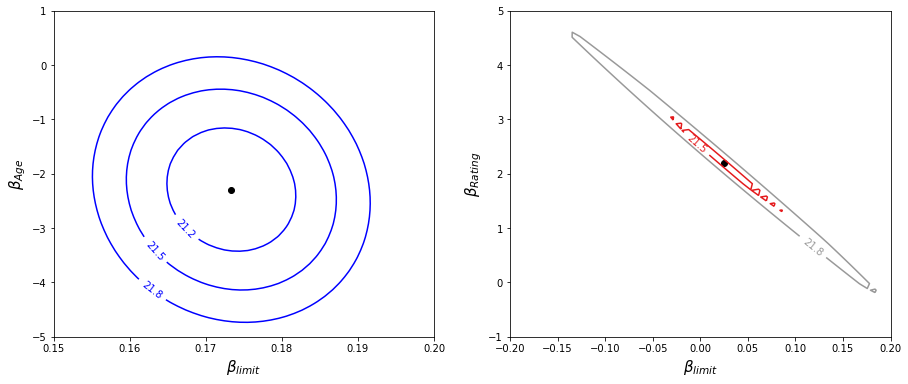

In [98]:
# Contour plot
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(121)
CS = ax1.contour(X,Y,rss, levels = [21.25, 21.5, 21.8], colors = 'b')
ax1.scatter(slope_2, slope_1, color = 'black') # plotting the minimum RSS value
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_xlabel(r'$\beta_{limit}$', fontsize = 15)
ax1.set_ylabel(r'$\beta_{Age}$', fontsize = 15)

ax2 = fig.add_subplot(122)
CS = ax2.contour(X1,Y1,rss1, levels = [21.5, 21.8], cmap=plt.cm.Set1)
ax2.scatter(slope_21, slope_11, color = 'black') # plotting the minimum RSS value
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_xlabel(r'$\beta_{limit}$', fontsize = 15)
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize = 15)

plt.show()

As can be see in the above plot that when using two collinear variable ratings and limit is causing the contour plot to become narrow and now we have a lot values of beta's that can result in similar value of RSS. 

__Remedies__ :-

1. Use correlation matrix or Cramer's V test for collinearity.
2. Use VIF for multicollinearity 
$$VIF(\hat \beta_j) = \frac{1}{1-R^{2}_{X_j|X_{j-1}}}$$
$R^{2}_{X_j|X_{j-1}}$ = $R^2$ from a regression of $X_j$ onto all of the other predictors. If VIF exceeds 5 or 10, then multicollinearity is present. 

Another solution is to combine the two collinear variable. E.g. average of standardized values.

#### K Nearest Neighbor :-
(and comparsion with Linear Regression)

Given a value for K and a prediction point $x_0$, KNN regression first identifies the K training observations that are closest to $x_0$, represented by $N_0$. It then estimates $f(x_0)$ using the average of all the training responses in $N_0$.
$$\hat f(x_0) = \frac{1}{K}\sum_{x_i \epsilon N_0}y_i.$$

1. Linear regression model performs better when actual function form is closer to linear.
2. If relationship is non linear then for a suitable value of K, KNN will perform then least square estimate.
3. If no. of predictors increase but sample size n is not large enough then linear regression is a better approach.

In higher dimensions there is effectively a reduction in sample size i.e. K observation that are nearest to a given test observation $x_0$ may be very far away from $x_0$ in p-dimensional space when p is large.

Also, linear regression is more interpretible.

## Lab : Linear Regression

In [3]:
# Loading Boston dataset from sklearn.datasets
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
# to get an output like R in python, we will use statsmodel instead of sklearn
dataset['MEDV'] = boston_dataset.target
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
# Building a simple model using just one variable.
model = ols('MEDV ~ LSTAT', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        11:15:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# We can get just the coefficient values. 
model.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In [29]:
# We can get the 95% confidence interval for each of the paramters using conf_int. We can also change the confidence limit usig alpha argument in the function.
model.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


In [47]:
# Confidence interval and prediction interval for predictions. Mean_ci is the confidence interval and obs_ci is the prediction interval.
model.get_prediction(pd.DataFrame({'LSTAT': [5,10,15]})).summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


__Confidence interval vs prediction interval__

As can be seen that the prediction interval is wider than the confidence interval. This is because the mean_CI include only the standard error of beta coefficients because the mean of error (irreducible error) is assumed to be zero. But in case of prediction interval, we are including error of coefficients and error associated to prediction as well.

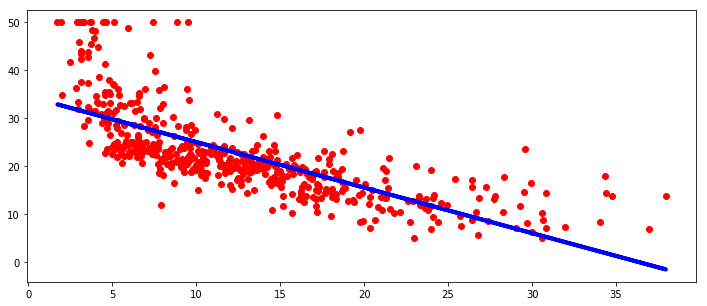

In [55]:
# Plotting the regression line
plt.figure(figsize = (12,5))
plt.scatter(dataset['LSTAT'], dataset['MEDV'], color = "r")
plt.plot(dataset['LSTAT'], model.predict(dataset['LSTAT']), color = "b", linewidth = 4.0)
plt.show()

The plot is showing that there is some non linearity in the data.

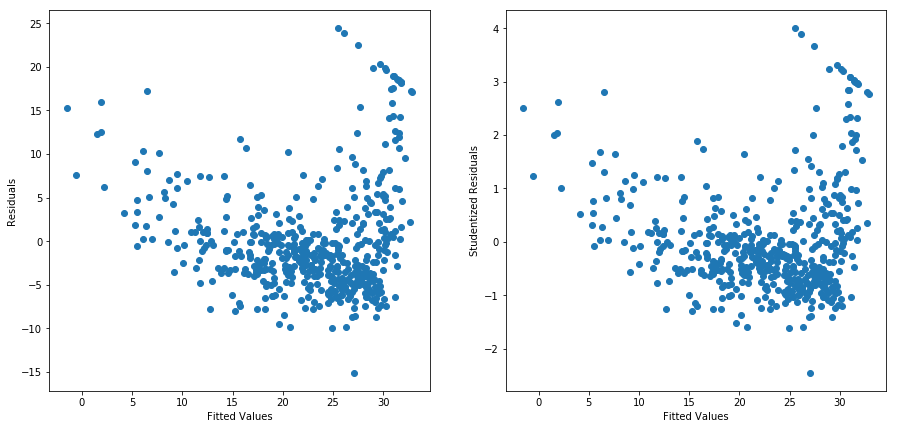

In [69]:
# plotting residuals and fitted values
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(121)
ax1.scatter(model.predict(dataset['LSTAT']), model.resid)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# plotting studentized residuals and fitted values
ax2 = fig.add_subplot(122)
ax2.scatter(model.predict(dataset['LSTAT']), model.outlier_test()['student_resid'])
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Studentized Residuals')
plt.show()

The above plot show presence of non-linearity in the data.

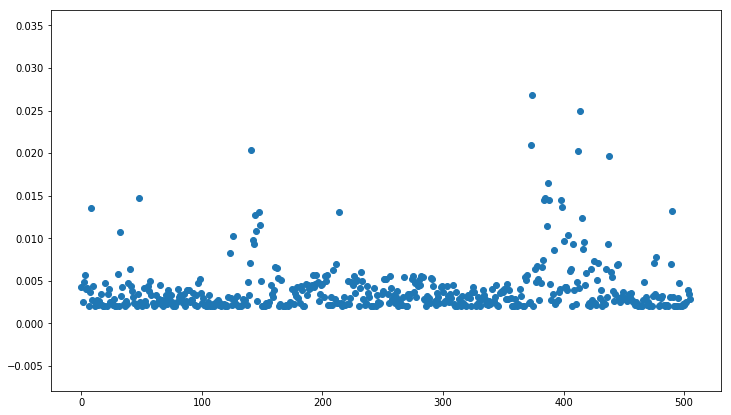

In [93]:
# Ploting the leverage for all the values
plt.figure(figsize = (12,7))
plt.scatter(list(range(len(dataset))), model.get_influence().summary_frame().hat_diag)
plt.show()

In [108]:
# Getting the data point with highest leverage.
leverage = list(model.get_influence().summary_frame().hat_diag)
print("Index of largest element is ", leverage.index(max(leverage)) +1)

Index of largest element is  375


## Lab : Mutiple Linear Regression

In [10]:
# Fitting the model with 2 variables
model = ols('MEDV ~ LSTAT + AGE', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           2.98e-88
Time:                        11:15:23   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Fitting the model with all the variables
X = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV'])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:26:57   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Rsquare and RMSE of the model
print(model.rsquared, model.mse_resid)

0.9591784308892757 24.80977149229894


In [31]:
# Variance Inflation Factor (VIF). Calcuating VIF is a little tricky in python.
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names) # design matrix, all predictors.
X = sm.add_constant(df) # adding a constant variable with value 1 for intercept.
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index = X.columns)

const      585.425210
CRIM         1.773321
ZN           2.298641
INDUS        3.991194
CHAS         1.073943
NOX          4.395064
RM           1.934161
AGE          3.100860
DIS          3.956551
RAD          7.480539
TAX          9.008472
PTRATIO      1.799220
B            1.345832
LSTAT        2.938127
dtype: float64

In [32]:
# Using interaction terms. * will fit main effects with the interaction effects.
model = ols('MEDV ~ LSTAT * AGE', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           4.86e-88
Time:                        12:41:58   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Non linear transformation 
model2 = ols('MEDV ~ LSTAT + np.power(LSTAT,2)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          1.56e-112
Time:                        16:45:45   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(LSTAT, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A non zero p-value means we have a improved model.

In [9]:
model = ols('MEDV ~ LSTAT', data = dataset).fit()
# Now we will do a ANOVA test to compare the 2 models. 
anova_lm(model, model2)

/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here our null hypothesis is that 2 models fit the data equally well. Here, pvalue is almost zero. This means that model2 with quadratic term is superior than model with just linear effect.

In [26]:
# Polynomial Regression Model
X = dataset['LSTAT'].ravel().reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=5)
xp = polynomial_features.fit_transform(X)
y = pd.DataFrame(boston_dataset.target, columns = ['MEDV'])

The above code will create a polynomial features but it also transform the variable. Hence the coefficient will not from the results in the R code mentioned in the book.

In [27]:
model = sm.OLS(y, xp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          8.73e-122
Time:                        23:09:16   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.000      60.618      74.781
x1           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
x2             1.2728      0.223      5.703      0.000       0.834       1.711
x3            -0.0683      0.014     -4.747      0.000      -0.097      -0.040
x4             0.0017      0.000      4.143      0.000       0.001       0.003
x5         -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# We can also fit log variables
model = ols('MEDV ~ np.log(LSTAT)', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          9.28e-122
Time:                        23:14:46   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Carseats.csv"
Carseats = pd.read_csv(url)
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [39]:
# Fitting categorical variables. we need to make sure the categorical variable is defined as object.
# df.dtypes will return the class of all the columns in data frame df.
Carseats_col = list(Carseats.columns)
Carseats_col.remove('Sales')
all_columns = "+".join(Carseats_col)
my_formula = "Sales~" + all_columns + "+ Income:Advertising + Price:Age"
model = ols(formula = my_formula, data= Carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 19 Mar 2020   Prob (F-statistic):          6.14e-166
Time:                        14:04:45   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Excercises 

#### Conceptual

1. 4 hypothesis corresponding to 4 p values in the table 3.4.
$H_0$ :- $\beta_0$ = 0, no significant use of intercept.
$H_0$ :- $\beta_1$ = 0, no significant effect of TV ads. on Sales.
$H_0$ :- $\beta_2$ = 0, no significant effect of Radio ads. on Sales.
$H_0$ :- $\beta_3$ = 0, no significant effect of Newspaper ads. on Sales.
   
p values indicates that investment in radio and TV has significant effect on sales.
p values indicates that investment in Newspaper has significant effect on sales.

2. KNN classifier is used for classification purpose when, the output variable is class variable. KNN will select K neighbour of the test data point and assign the majority class as output.

KNN regressor will be used if the output variable is continous. KNN will select K neighbour of the test data point and assign the average or weighted average of y as output.

3. 
(a). For males :-
$Y_{sales} = 50 + 20 * GPA + 0.07 * IQ + 0.01 GPA * IQ.$

For Females:-
$Y_{sales} = 85 + 10 * GPA + 0.07 * IQ + 0.01 GPA * IQ.$

For male to earn more money.
50 + 20 * GPA > 85 + 10 * GPA.

Males will earn more money.

10GPA > 35.

GPA > 3.5. If GPA is high enough then average male salary is higher then females.

(b). 85 + 10 * 4 + 0.07 * 110 + 0.01 * 110 * 4.
$137.1 is the salary.

(c). False. It depends on the variability of GPA and IQ interaction. 

4.
(a). As the true relationship is linear, we expect training RSS of linear model to be smaller.

(b). ANOVA test can be used to compare both the models.

(c). Polynomial should give less TSS than linear. But as we do not know about the actual relationship. It's hard to say by just looking at train RSS. We should consider test RSS as well to get the bigger picture.

5.
It's a derivation of a formula. Predicted values are linear combination of response values. Not included here.

6. for $x_i\ =\ \bar x$
$$\hat y = \beta_0 + \beta_1 \bar x$$
using the least square solution of intercept.
$$\bar y - \beta_1 \bar x + \beta_1 \bar x\ =\ \bar y$$



#### Applied

__Q 8.  Auto Dataset__

In [2]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Auto.csv"
Auto = pd.read_csv(url, error_bad_lines = False, na_values = '?')

In [6]:
# (a). Fit the model with one predictor and print the summary.
model = ols('mpg ~ horsepower', data = Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           7.03e-81
Time:                        12:45:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(i). As we can see that the p-value is quite small. This means that horsepower has significant effect on mpg.

(ii). For unit increase in horsepower, mpg decrease by 0.15 average. Also, The adjusted R-squared is 60%. So we can say that the relationship is quite strong.

(iii). Relationship is negetive.

(iv).

In [8]:
# Prediction for horsepower 98 and 95% CI.
model.get_prediction(pd.DataFrame({'horsepower': [98]})).summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


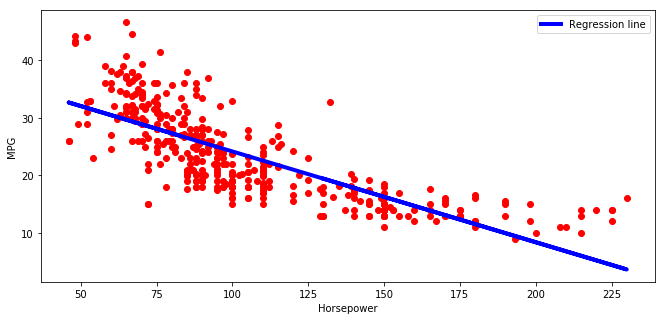

In [14]:
# (b). Plotting the regression line.
plt.figure(figsize = (11,5))
plt.scatter(Auto.horsepower, Auto.mpg, color = 'r', label = "")
plt.plot(Auto.horsepower, model.predict(Auto.horsepower), color = 'b', linewidth = 4, label = "Regression line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.show()

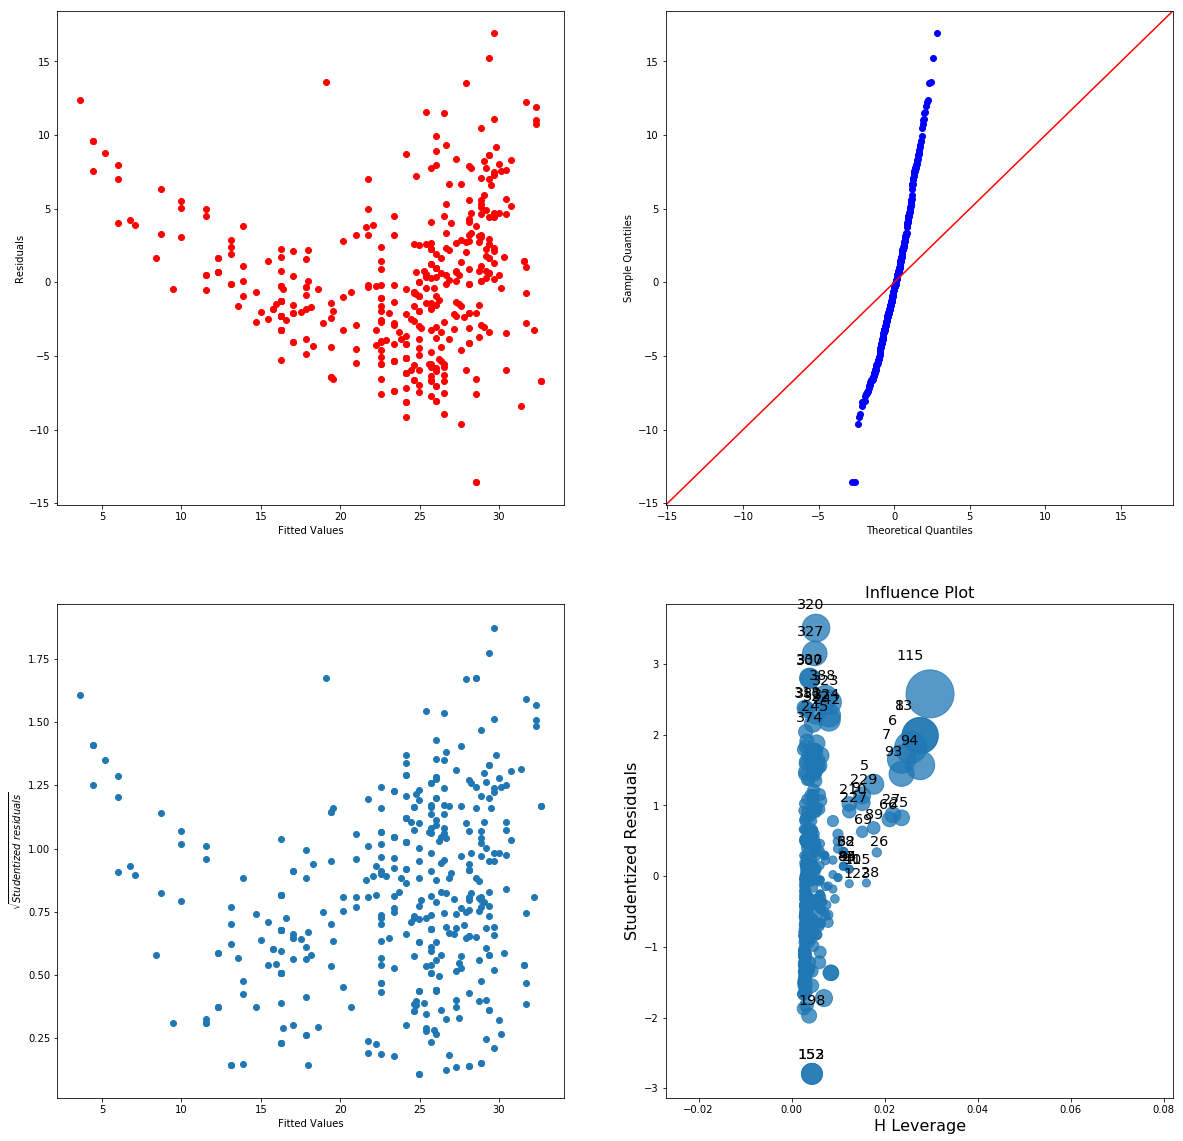

In [44]:
# Diagnostic Plots
# Residual vs Fitted values plot.
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
# residual plot
ax1.scatter(model.predict(Auto.horsepower), model.resid, color = 'r')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax2 = fig.add_subplot(222)
# Normal QQ plot for residuals
sm.qqplot(model.resid, line = '45', ax = ax2)
ax3 = fig.add_subplot(223)
# Scale - location plot.
ax3.scatter(model.predict(Auto.horsepower), np.sqrt(np.abs(model.outlier_test()['student_resid'])))
ax3.set_xlabel("Fitted Values")
ax3.set_ylabel("$\sqrt{Studentized\ residuals}$")
ax4 = fig.add_subplot(224)
# Influence plot/ leverage vs residual plot.
sm.graphics.influence_plot(model, ax = ax4, criterion = "cooks")
plt.show()

The above plots shows that the relationship is non-linear and also Normal QQ plot shows that the residuals are not normal. The influence plot shows the presence of some outlier as well and high leverage points as well.

__Q. 9 Auto Dataset Multiple regression__ 

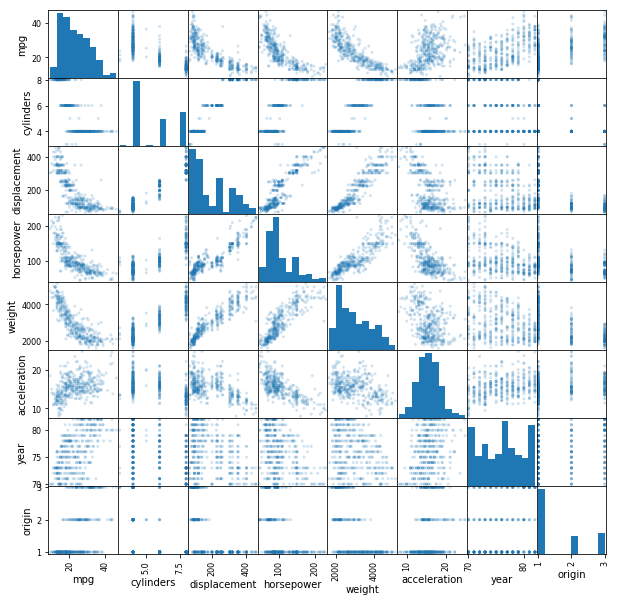

In [3]:
#(a). Scatter plot of all the variables.
ax = pd.plotting.scatter_matrix(Auto, alpha = 0.2, figsize = (10,10))

In [6]:
#(b). Correlation matrix of all the variables.
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [11]:
# (c). Fitting a multiple regression model.
Auto_col = list(Auto.columns)
Auto_col = [i for i in Auto_col if i not in ['mpg','name']]
all_columns = "+".join(Auto_col)
my_formula = "mpg~" + all_columns
model = ols(formula = my_formula, data= Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 24 Mar 2020   Prob (F-statistic):          2.04e-139
Time:                        23:19:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(i). The F statistic is quite high, this means that there is relationship between predictors and the response. 

(ii). displacement, weight, year, origin have a significant relationship with mpg.

(iii). Year variable coefficient is 0.75. This means that with each new year, mpg increases by 0.75 unit.

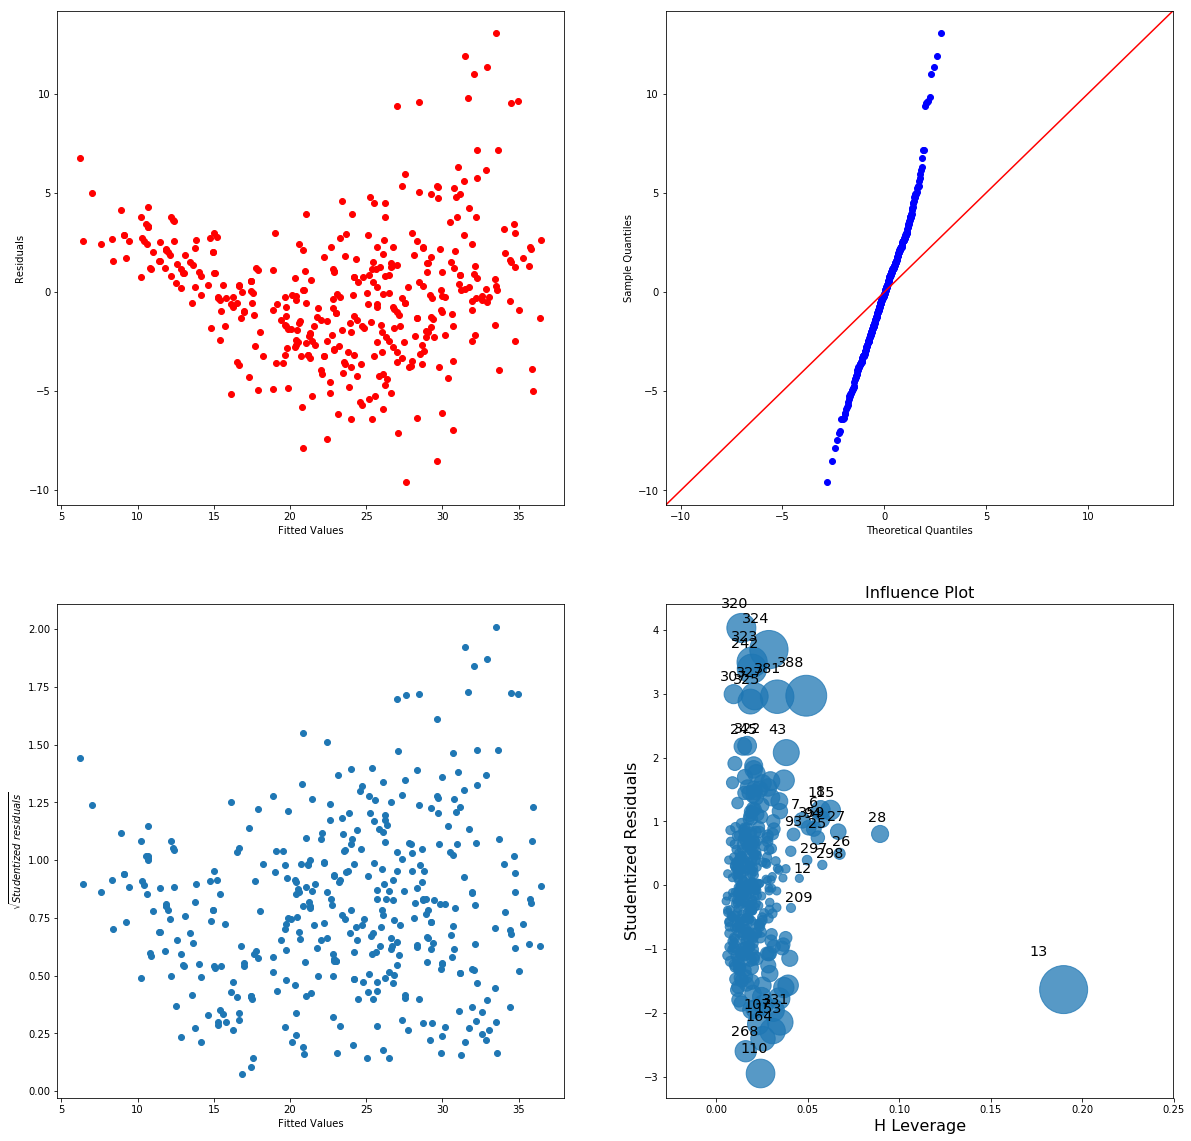

In [12]:
# (d). 
# Diagnostic Plots
# Residual vs Fitted values plot.
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
# residual plot
ax1.scatter(model.predict(Auto), model.resid, color = 'r')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax2 = fig.add_subplot(222)
# Normal QQ plot for residuals
sm.qqplot(model.resid, line = '45', ax = ax2)
ax3 = fig.add_subplot(223)
# Scale - location plot.
ax3.scatter(model.predict(Auto), np.sqrt(np.abs(model.outlier_test()['student_resid'])))
ax3.set_xlabel("Fitted Values")
ax3.set_ylabel("$\sqrt{Studentized\ residuals}$")
ax4 = fig.add_subplot(224)
# Influence plot/ leverage vs residual plot.
sm.graphics.influence_plot(model, ax = ax4, criterion = "cooks")
plt.show()

The residual plot still looks non linear. Also, the residuals do not have common variance and are not normally distributed. The leverage plot show an observation with very high leverage value. Also, we can see some outlier with high studentized residuals.

In [14]:
# (e). We can add interaction in the model using :.
Auto_col = list(Auto.columns)
Auto_col = [i for i in Auto_col if i not in ['mpg','name']]
all_columns = "+".join(Auto_col)
my_formula = "mpg~" + all_columns + ' + weight : displacement'
model = ols(formula = my_formula, data= Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     291.1
Date:                Tue, 24 Mar 2020   Prob (F-statistic):          1.27e-157
Time:                        23:44:32   Log-Likelihood:                -977.57
No. Observations:                 392   AIC:                             1973.
Df Residuals:                     383   BIC:                             2009.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.3892      4.301     -1.253      0.211     -13.845       3.066
cylinders               0.1175      0.294      0.399      0.690      -0.461       0.696
displacement           -0.0684      0.011     -6.193      0.000      -0.090      -0.047
horsepower             -0.0328      0.012     -2.649      0.008      -0.057      -0.008
weight                 -0.0106      0.001    -14.915      0.000      -0.012      -0.009
acceleration            0.0672      0.088      0.764      0.446      -0.106       0.240
year                    0.7852      0.046     17.246      0.000       0.696       0.875
origin                  0.5610      0.262      2.139      0.033       0.045       1.077
weight:displacement  2.269e-05   2.26e-06     10.054      0.000    1.83e-05    2.71e-05
==============================================================================
Omnibus:                       47.095   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.127
Skew:                           0.646   Prob(JB):                     1.10e-22
Kurtosis:                       5.127   Cond. No.                     2.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that weight and displacement interaction is coming significant as p value is quite small. We can check other interactions as well like this.

In [15]:
# We can try transformed variable as well.
Auto_col = list(Auto.columns)
Auto_col = [i for i in Auto_col if i not in ['mpg','name']]
all_columns = "+".join(Auto_col)
my_formula = "mpg~" + all_columns + ' + np.power(horsepower,2)'
model = ols(formula = my_formula, data= Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     282.8
Date:                Tue, 24 Mar 2020   Prob (F-statistic):          1.42e-155
Time:                        23:47:20   Log-Likelihood:                -982.41
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     383   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.3237      4.625      0.286      0.775      -7.769      10.417
cylinders                   0.3489      0.305      1.145      0.253      -0.250       0.948
displacement               -0.0076      0.007     -1.026      0.306      -0.022       0.007
horsepower                 -0.3195      0.034     -9.302      0.000      -0.387      -0.252
weight                     -0.0033      0.001     -4.820      0.000      -0.005      -0.002
acceleration               -0.3306      0.099     -3.333      0.001      -0.526      -0.136
year                        0.7353      0.046     15.989      0.000       0.645       0.826
origin                      1.0144      0.255      3.985      0.000       0.514       1.515
np.power(horsepower, 2)     0.0010      0.000      9.449      0.000       0.001       0.001
==============================================================================
Omnibus:                       28.137   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.389
Skew:                           0.470   Prob(JB):                     5.12e-11
Kurtosis:                       4.421   Cond. No.                     4.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

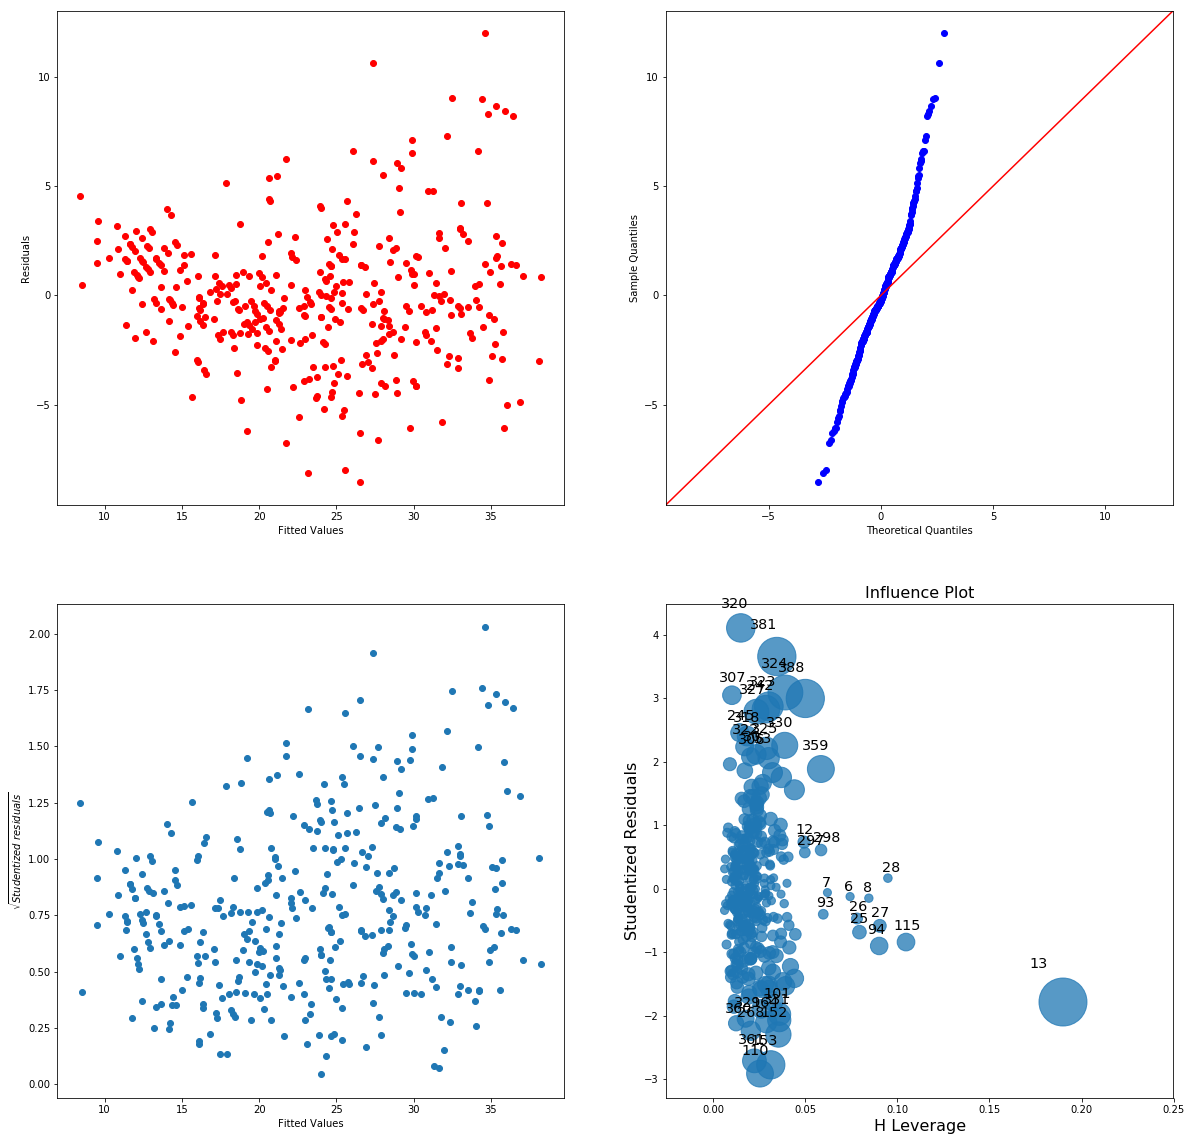

In [16]:
# (d). 
# Diagnostic Plots
# Residual vs Fitted values plot.
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
# residual plot
ax1.scatter(model.predict(Auto), model.resid, color = 'r')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax2 = fig.add_subplot(222)
# Normal QQ plot for residuals
sm.qqplot(model.resid, line = '45', ax = ax2)
ax3 = fig.add_subplot(223)
# Scale - location plot.
ax3.scatter(model.predict(Auto), np.sqrt(np.abs(model.outlier_test()['student_resid'])))
ax3.set_xlabel("Fitted Values")
ax3.set_ylabel("$\sqrt{Studentized\ residuals}$")
ax4 = fig.add_subplot(224)
# Influence plot/ leverage vs residual plot.
sm.graphics.influence_plot(model, ax = ax4, criterion = "cooks")
plt.show()

Diagnosed plot shows some improvement, but still a lot of unexplained variation in the data.

__Q. 10 Carseats dataset__

In [2]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Carseats.csv"
Carseats = pd.read_csv(url)

In [3]:
# (a). Fit a model and print the summary.
model = ols('Sales ~ Price + Urban + US', data = Carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           2.39e-23
Time:                        00:28:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b). Coefficient interpretation.

Urban coefficient is -0.0219. This is the average difference between Urban and non urban carseats.

US coefficient is 1.2006. This is the average difference between US and non US carseats.

Also, one unit increase in price results in average decrease of 0.0545 unit in Sales.

(c). Equation of the model.

$$y_i\ =\ 13.0435\ +\ -0.0219\ +\ 1.2006\  -0.545\ *\ Price,\ if\ Urban\ =\ Yes\ and\ US\ =\ Yes$$
$$y_i\ =\ 13.0435\ +\ -0.0219\ -0.545\ *\ Price,\ if\ Urban\ =\ Yes\ and\ US\ =\ No$$
$$y_i\ =\ 13.0435\ +\ 1.2006\ -0.545\ *\ Price,\ if\ Urban\ =\ No\ and\ US\ =\ Yes$$
$$y_i\ =\ 13.0435\ -0.545\ *\ Price,\ if\ Urban\ =\ No\ and\ US\ =\ No$$

(d). For Urban, we can reject the null hypothesis as the p value is very high.

In [4]:
# (e). Fit a model and print the summary.
model = ols('Sales ~ Price + US', data = Carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           2.66e-24
Time:                        00:28:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that removing Urban variable did not result in much decrease in Adjusted R-sq. However, the R-squared is quite small for both the models, only 23.5%

In [5]:
#(g). Confidence intervel of coefficients.
model.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


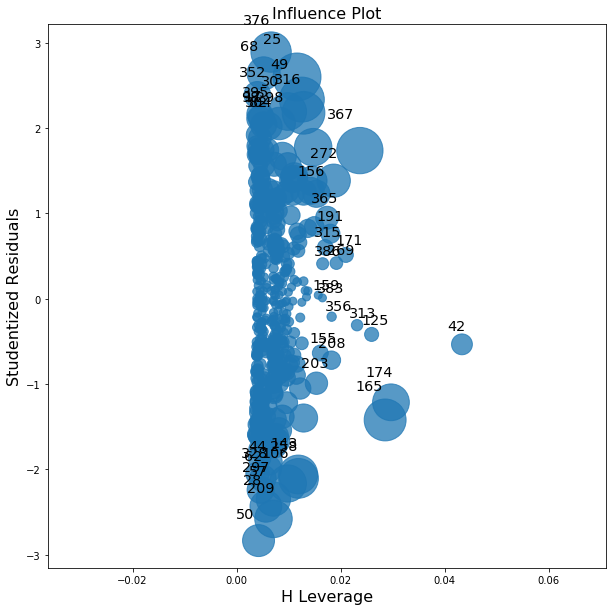

In [10]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
sm.graphics.influence_plot(model, ax = ax, criterion = "cooks")
plt.show()

The leverage plot some presence of high leverage points and also some outliers.